In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

This Notebook will show Data Analysis for simple Key Metrics indicative of success of an online e-commerce shop.

# Data Import

In [2]:
## importing the data
data = pd.read_csv('../data/OnlineRetail.csv', encoding= 'unicode_escape')

In [3]:
## inspecting the data
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
## information regarding nr. of rows, data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
## changing invoicedate column to datetime format
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

In [6]:
## creating new column for monthly grouping of data
data['InvoiceYearMonth'] = data['InvoiceDate'].map(lambda date: 100*date.year + date.month)

# Calculating Monthly Revenue

*Revenue = Active Customer Count * Order Count * Average Revenue per Order*

In [7]:
## creating revenue column
data["Revenue"] = data["Quantity"] * data["UnitPrice"]

In [8]:
## creating new dataframe by grouping revenue monthly
df = pd.DataFrame(data.groupby("InvoiceYearMonth")["Revenue"].sum()).reset_index()

In [9]:
df.head()

,InvoiceYearMonth,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121


In [19]:
## plotting the monthly revenue
plt.figure(figsize=(20,10))
plt.plot(df.index, df["Revenue"], color= 'green')

plt.title("Monthly Revenue", size= 15)

KeyError: 'Revenue'

<Figure size 1440x720 with 0 Axes>

In [11]:
## calculating monthly growth
df["MonthlyGrowth"] = df["Revenue"].pct_change()

Text(0.5, 1.0, 'Monthly Growth Rate')

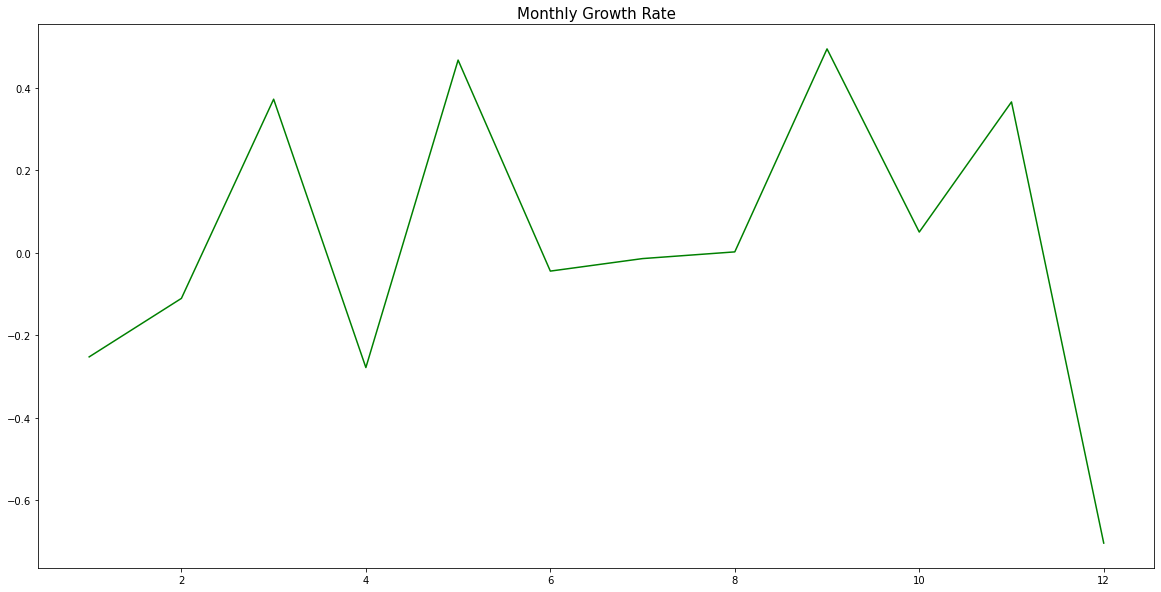

In [12]:
## plotting monthly growth
plt.figure(figsize=(20,10))
plt.plot(df.index, df["MonthlyGrowth"], color= 'green')

plt.title("Monthly Growth Rate", size= 15)

# Calculating Monthly Active Customers

In [20]:
## grouping data monthly to calculate nr of active customers
df = pd.DataFrame(data.groupby("InvoiceYearMonth")["CustomerID"].nunique()).reset_index()
df.columns = ["InvoiceYearMonth", "ActiveCustomers"]

In [21]:
df.head()

,InvoiceYearMonth,ActiveCustomers
0,201012,948
1,201101,783
2,201102,798
3,201103,1020
4,201104,899


Text(0.5, 1.0, 'Monthly Active Customers')

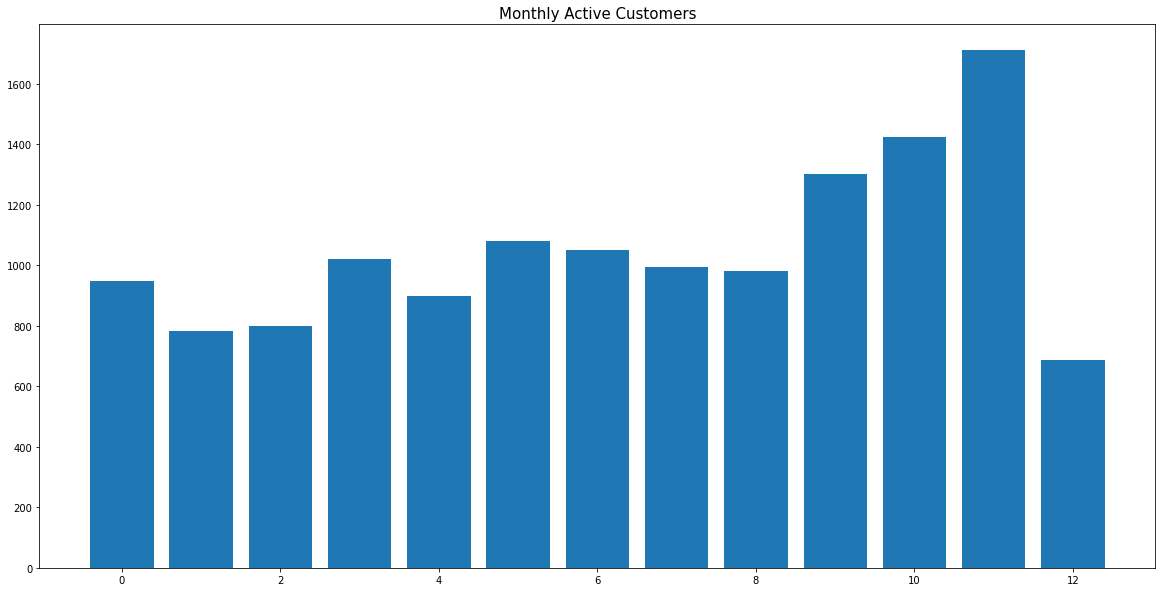

In [22]:
## plotting the nr. of active customers
plt.figure(figsize=(20,10))

plt.bar(df.index, df["ActiveCustomers"])
plt.title("Monthly Active Customers", size= 15)

In [23]:
## calculating monthly change
df["MonthlyGrowth"] = df["ActiveCustomers"].pct_change()

Text(0.5, 1.0, 'Monthly Growth Rate')

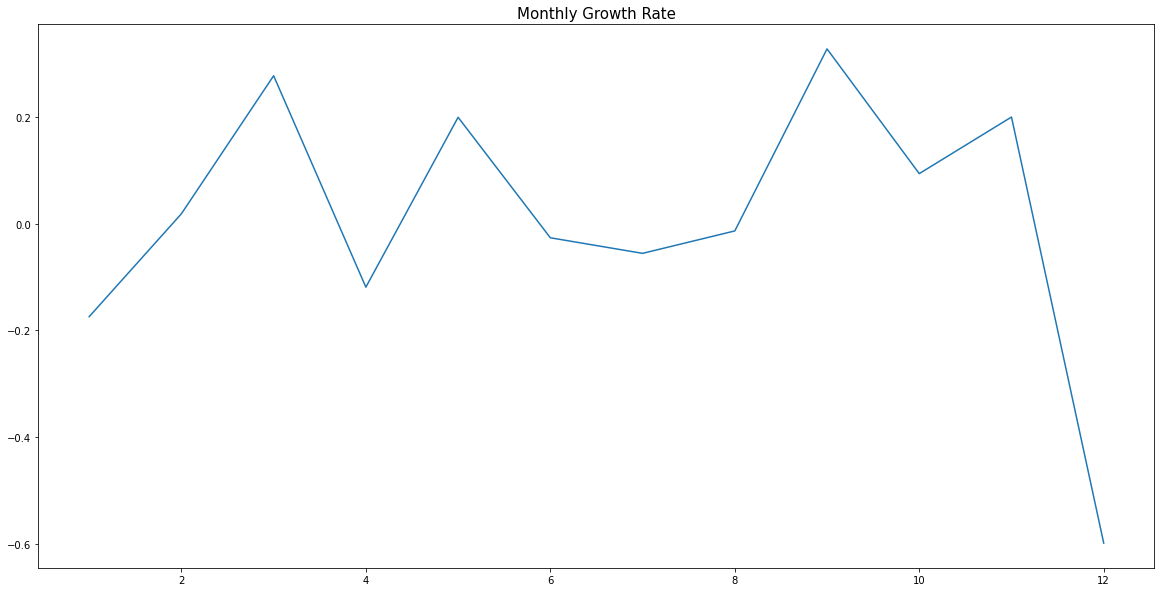

In [24]:
## plotting monthly growth rate of customers
plt.figure(figsize=(20,10))
plt.plot(df.index, df["MonthlyGrowth"])

plt.title("Monthly Growth Rate", size= 15)

# Calculating Monthly Order Count


In [ ]:
## to be continued ...